In [1]:
from sys import path
path.append('../../finite differences/')

In [2]:
from derivatives import *

from matplotlib import pyplot as plt

In [3]:
def get_error(N, der, f, fx, fy, fxx, fyy, fxy, xi, dxi=None):
    tnx = np.linspace(0, 1, N + 1)
    tny = np.linspace(0, 1, 2 * N + 1)
    xn = xi(tnx).reshape(-1, 1)
    yn = xi(tny).reshape(1, -1)
    
    taux = tnx[1] - tnx[0]
    tauy = tny[1] - tny[0]
    hx = np.diff(xn)
    hy = np.diff(yn)
    if not dxi is None:
        hx = taux * dxi( tnx[:-1] + taux / 2.0 ).reshape(-1, 1)
        hy = tauy * dxi( tny[:-1] + tauy / 2.0 ).reshape(1, -1)
    h1 = hx[:-1]
    h2 = hx[1:]
    
    d1 = hy[0, :-1]
    d2 = hy[0, 1:]
    
    u = f(xn, yn)
    ux = der.dx(u, h1, h2)
    uy = der.dy(u, d1, d2)
    uxx = der.d2x(u, h1, h2)
    uyy = der.d2y(u, d1, d2)
    uxy = der.dxy(u, h1, h2, d1, d2)
    
    ux_ = fx(xn, yn)
    uy_ = fy(xn, yn)
    
    uxx_ = fxx(xn, yn)
    uyy_ = fyy(xn, yn)
    uxy_ = fxy(xn, yn)
    
    ux_[0, :] = 0.0
    ux_[:, 0] = 0.0
    ux_[-1, :] = 0.0
    ux_[:, -1] = 0.0

    uy_[0, :] = 0.0
    uy_[:, 0] = 0.0
    uy_[-1, :] = 0.0
    uy_[:, -1] = 0.0
    
    uxx_[0, :] = 0.0
    uxx_[:, 0] = 0.0
    uxx_[-1, :] = 0.0
    uxx_[:, -1] = 0.0
    
    uyy_[0, :] = 0.0
    uyy_[:, 0] = 0.0
    uyy_[-1, :] = 0.0
    uyy_[:, -1] = 0.0
    
    uxy_[0, :] = 0.0
    uxy_[:, 0] = 0.0
    uxy_[-1, :] = 0.0
    uxy_[:, -1] = 0.0
    
    errx = np.linalg.norm(ux - ux_) / np.linalg.norm(ux_)

    erry = np.linalg.norm(uy - uy_) / np.linalg.norm(uy_)
    
    errxx = np.linalg.norm(uxx - uxx_) / np.linalg.norm(uxx_)
    erryy = np.linalg.norm(uyy - uyy_) / np.linalg.norm(uyy_)
    errxy = np.linalg.norm(uxy - uxy_) / np.linalg.norm(uxy_)
    
    return errx, erry, errxx, erryy, errxy

In [4]:
n = 1
xi = lambda t: t ** n
dxi = lambda t: n * (t ** (n-1))
f = lambda x, y: np.sin(x ** 2 + y ** 2)
fx = lambda x, y: 2 * x * np.cos(x ** 2 + y ** 2)
fy = lambda x, y: 2 * y * np.cos(x ** 2 + y ** 2)

fxx = lambda x, y: 2 * np.cos(x ** 2 + y ** 2) - 4 * x ** 2 * np.sin(x ** 2 + y ** 2)
fyy = lambda x, y: 2 * np.cos(x ** 2 + y ** 2) - 4 * y ** 2 * np.sin(x ** 2 + y ** 2)
fxy = lambda x, y: -4 * x * y * np.sin(x ** 2 + y ** 2)

aa = 0.999
#xi = lambda t: 1 / (1 - aa * t) - 1.0
#dxi = lambda t: aa / (1 - aa * t) ** 2
#f = lambda x, y: np.exp(-x - y)
#fx = lambda x, y: -np.exp(-x - y)
#fy = lambda x, y: -np.exp(-x - y)

#fxx = lambda x, y: np.exp(-x - y)
#fyy = lambda x, y: np.exp(-x - y)
#fxy = lambda x, y: np.exp(-x - y)

N = 2

errx = []
erry = []
errxx = []
erryy = []
errxy = []

Ns = []
der = DerCntrl()
for i in range(10):
    _errx, _erry, _errxx, _erryy, _errxy = get_error(N, der, f, fx, fy, fxx, fyy, fxy, xi, dxi)
    
    errx.append(_errx)
    erry.append(_erry)
    errxx.append(_errxx)
    erryy.append(_erryy)
    errxy.append(_errxy)
    
    Ns.append(N)
    
    N *= 2
errx = np.asarray(errx)
erry = np.asarray(erry)
errxx = np.asarray(errxx)
erryy = np.asarray(erryy)
errxy = np.asarray(errxy)

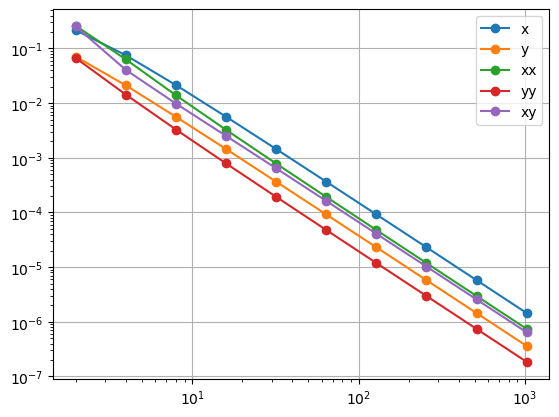

In [5]:
plt.loglog(Ns, errx, '-o', label='x')
plt.loglog(Ns, erry, '-o', label='y')
plt.loglog(Ns, errxx, '-o', label='xx')
plt.loglog(Ns, erryy, '-o', label='yy')
plt.loglog(Ns, errxy, '-o', label='xy')
plt.grid()
plt.legend()
plt.show()

In [6]:
for err in [errx, erry, errxx, erryy, errxy]:
    peff = np.log(err[:-1] / err[1:]) / np.log(2.0)
    peff = peff[3:]
    print(np.mean(peff), np.std(peff))

1.9885498904351329 0.01222031057538389
1.994301813049639 0.00607901486667112
2.0162230481775705 0.01677920029308248
2.0093039549104414 0.009717075299387604
1.9893709283321235 0.010048802834250003


In [7]:
from solver import *
from boundary_conditions import Neuman, Dirichle, Boundary2D

In [8]:
T = 1.0

In [9]:
def gridX(Nx):
    xn = np.linspace(0, np.pi, Nx + 1)
    hx = np.diff(xn)
    return xn, hx

def gridY(Ny):
    xn = np.linspace(0, np.pi, Ny + 1)
    hx = np.diff(xn)
    return xn, hx

def gridT(Nt):
    return np.linspace(0, T, Nt + 1)

In [10]:
init = lambda x, y: np.cos(x) * np.cos(y)

mux = lambda x, y: 0.0
muy = lambda x, y: 0.0 

sigmax = lambda x, y: 1.0
sigmay = lambda x, y: 1.0
sigmaxy = lambda x, y: 0.0

In [11]:
Xleft = Neuman(lambda x, t: 0.0)

Xright = Neuman(lambda x, t: 0.0)

Yleft = Neuman(lambda x, t: 0.0)

Yright = Neuman(lambda x, t: 0.0)

boundary = Boundary2D(Xleft, Xright, Yleft, Yright)

In [12]:
problem = Problem(boundary, init, mux, muy, sigmax, sigmay, sigmaxy)

In [13]:
der = DerCntrl()

In [14]:
solver = ADI_CS(problem, der, gridX, gridY, gridT)

In [15]:
def get_error(Nx, Ny, M, solver):
    xn, _ = gridX(Nx)
    yn, _ = gridY(Ny)
    res = solver.solve(Nx, Ny, M)
    
    xgrid, ygrid = np.meshgrid(xn, yn, indexing='ij')
    analit = np.exp(-2 * T) * np.cos(xgrid) * np.cos(ygrid)
    res = solver.solve(Nx, Ny, M)
    
    
    error = np.linalg.norm(res[-1] - analit) / np.linalg.norm(analit) * 100
    return error

In [16]:
res = solver.solve(20, 20, 100)

In [20]:
Nx = 400
Ny = 400
M = 2
err = []
Ms = []
for i in range(6):
    error = get_error(Nx, Ny, M, solver)
    
    err.append(error)
    
    Ms.append(M)
    
    M *= 2

In [21]:
err = np.asarray(err)
Ms = np.asarray(Ms)

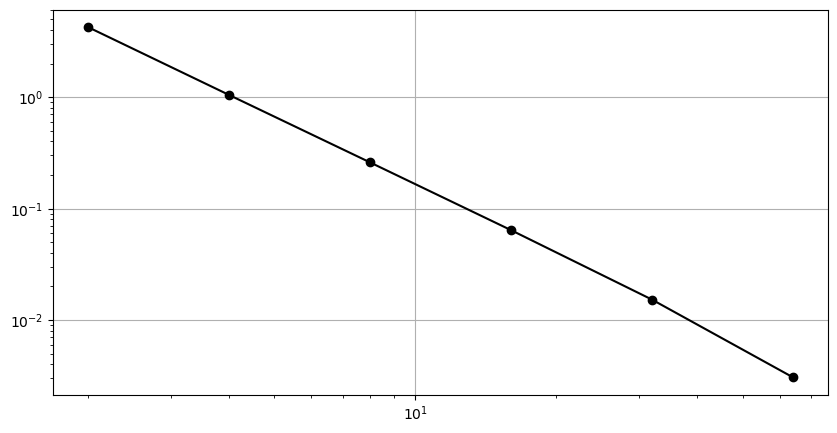

In [22]:
plt.figure(figsize=(10, 5))
plt.loglog(Ms, err, '-ok')
plt.grid()
plt.show()